# scikit-learn 첫걸음

In [14]:
from IPython.display import Image

사이킷런에서 붓꽃 데이터셋을 적재합니다. 세 번째 열은 꽃잎의 길이이고 네 번째 열은 꽃잎의 너비입니다. 클래스는 이미 정수 레이블로 변환되어 있습니다. 0=Iris-Setosa, 1=Iris-Versicolor, 2=Iris-Virginica 입니다.

In [2]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2,3]]
y = iris.target
print('클레스 레이블: ', np.unique(y))


클레스 레이블:  [0 1 2]


훈련된 모델 성능을 평가하기 위해 데이터셋을 훈련 데이터셋과 테스트 데이터셋으로 분할한다. 

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

사이킷런 model_selection 모듈의 trian_test_split 함수를 사용해 X와 y 배열을 랜덤하게 나눈다.  
30%는 테스트 데이터(45개 샘플), 70%는 훈련 데이터(105개 샘플)가 된다.  

stratify = y를 통해 계층화 기능을 사용한다. 여기서 계층화는 train_test_split 함수가 훈련 데이터셋과 테스트 데이터셋의 클래스 레이블 비율을 입력 데이터셋과 동일하게 만든다는 의미이다. 

In [4]:
print('y의 레이블 카운트:', np.bincount(y))
print('y_train의 레이블 카운트:', np.bincount(y_train))
print('y_test의 레이블 카운트:', np.bincount(y_test))

y의 레이블 카운트: [50 50 50]
y_train의 레이블 카운트: [35 35 35]
y_test의 레이블 카운트: [15 15 15]


사이킷런의 preporcessing 모듈의 StandardScaler 클래스를 사용하여 특성을 표준화.

In [5]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# 사이킷런으로 퍼셉트론 훈련하기

In [6]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(eta0=0.1, random_state=1) #eta0는 퍼셉트론에서 사용했던 학습률 eta와 같다.
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, random_state=1)

In [7]:
y_pred = ppn.predict(X_test_std)
print('잘못 분류된 샘플 개수: %d' % (y_test != y_pred).sum())

잘못 분류된 샘플 개수: 1


In [8]:
from sklearn.metrics import accuracy_score

print('정확도: %.3f' % accuracy_score(y_test, y_pred))

정확도: 0.978


In [9]:
print('정확도: %.3f' % ppn.score(X_test_std, y_test))

정확도: 0.978


plot_decision_regions 함수를 사용하여 새로운 퍼셉트론 모델의 결정경계를 그려서 세 개의 붓꽃 샘플을 잘 구분하는지 시각화. 

In [10]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    
    # 마커와 컬러맵 설정
    markers = ('s','x','o','^','v')
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 걸정 경계를 그린다
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # 테스트 샘플을 부각하여 그립니다.
    if test_idx:
        # 모든 샘플을 그립니다.
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    facecolor='none',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

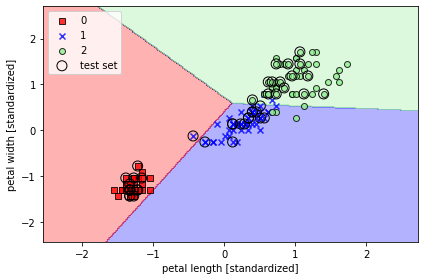

In [11]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=ppn, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
# plt.savefig('images/03_01.png', dpi=300)
plt.show()

퍼셉트론 알고리즘은 선형적으로 구분되지 않는 데이터셋에는 수렴하지 못한다. 실전에서 보통 퍼셉트론 알고리즘을 추천하지 않는 이유이다. 

# 로지스틱 회귀를 사용한 클래스 확률 모델링

퍼셉트론 규칙은 머신 러닝 분류 알고리즘을 배우기에 간단하고 좋은 모델이지만 가장 큰 단점은 클래스가 선형적으로 구분되지 않을 때 수렴할 수 없다는 것이다.  
에포크마다 적어도 하나의 샘플이 잘못 분류되기 때문에 가중치 업데이트가 끝도 없이 계속된다. 물론 학습률을 바꾸거나 에포크 횟수를 늘릴 수 있지만 퍼셉트론은 이 데이터셋에 절대 수렴하지 못한다.  

여전히 간단하지만 선형 이진 분류 문제에 더 강력한 다른 알고리즘인 로지스틱 회귀(logistic regression)를 살펴보는 것이 현명한 방법이다.  

## 로지스틱 회귀의 이해와 조건부 확률

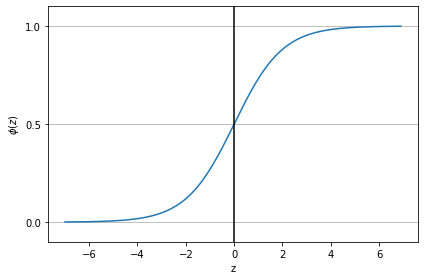

In [12]:
import matplotlib.pyplot as plt
import numpy as np


def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)

plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')

# y 축의 눈금과 격자선
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)

plt.tight_layout()
# plt.savefig('images/03_02.png', dpi=300)
plt.show()

In [15]:
Image(url='https://git.io/Jtm22', width=500) 

위의 그림은 아달린과 로지스틱 휘귀의 차이점에 대해서 나타낸 그림. 

## 로지스틱 비용 함수의 가중치 학습

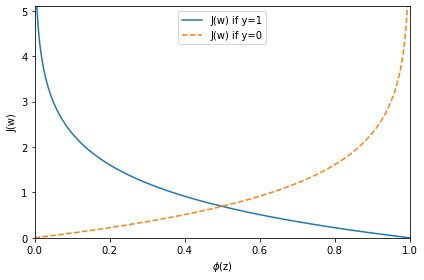

In [17]:
def cost_1(z):
    return - np.log(sigmoid(z))


def cost_0(z):
    return - np.log(1 - sigmoid(z))

z = np.arange(-10, 10, 0.1)
phi_z = sigmoid(z)

c1 = [cost_1(x) for x in z]
plt.plot(phi_z, c1, label='J(w) if y=1')

c0 = [cost_0(x) for x in z]
plt.plot(phi_z, c0, linestyle='--', label='J(w) if y=0')

plt.ylim(0.0, 5.1)
plt.xlim([0, 1])
plt.xlabel('$\phi$(z)')
plt.ylabel('J(w)')
plt.legend(loc='best')
plt.tight_layout()
# plt.savefig('images/03_04.png', dpi=300)
plt.show()

그래프의 x축은 0에서 1까지 범위의 시그모이드 활성화 값이다. y축은 해당하는 로지스틱 비용이다.  

클래스 1에 속한 샘플을 정확히 예측하면 비용이 0에 가까워지는 것을 볼 수 있다(실선). 비슷하게 클래스 0에 속한 샘플을 y=0으로 정확히 예측하면 y축의 비용이 0에 가까워진다(점선). 예측이 잘못되면 비용이 무한대가 된다. 잘못된 예측에 점점 더 큰 비용을 부여한다는 점이 중요하다. 

## 아달린 구현을 로지스틱 회귀 알고리즘으로 변경

In [18]:
class LogisticRegressionGD(object):
    """경사 하강법을 사용한 로지스틱 회귀 분류기

    매개변수
    ------------
    eta : float
      학습률 (0.0과 1.0 사이)
    n_iter : int
      훈련 데이터셋 반복 횟수
    random_state : int
      가중치 무작위 초기화를 위한 난수 생성기 시드

    속성
    -----------
    w_ : 1d-array
      학습된 가중치
    cost_ : list
      에포크마다 누적된 로지스틱 비용 함수 값

    """
    def __init__(self, eta=0.05, n_iter=100, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """훈련 데이터 학습

        매개변수
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          n_samples 개의 샘플과 n_features 개의 특성으로 이루어진 훈련 데이터
        y : array-like, shape = [n_samples]
          타깃값

        반환값
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            
            # 오차 제곱합 대신 로지스틱 비용을 계산합니다.
            cost = -y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output)))
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        """최종 입력 계산"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, z):
        """로지스틱 시그모이드 활성화 계산"""
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))

    def predict(self, X):
        """단위 계단 함수를 사용하여 클래스 레이블을 반환합니다"""
        return np.where(self.net_input(X) >= 0.0, 1, 0)
        # 다음과 동일합니다.
        # return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)


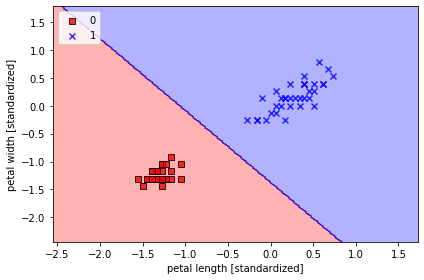

In [19]:
X_train_01_subset = X_train_std[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]

lrgd = LogisticRegressionGD(eta=0.05, n_iter=1000, random_state=1)
lrgd.fit(X_train_01_subset,
         y_train_01_subset)

plot_decision_regions(X=X_train_01_subset, 
                      y=y_train_01_subset,
                      classifier=lrgd)

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
# plt.savefig('images/03_05.png', dpi=300)
plt.show()

## 사이킷런을 사용하여 로지스틱 회귀 모델 훈련

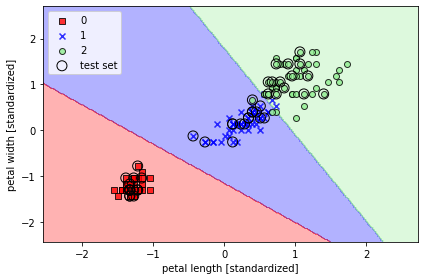

In [21]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=100.0, random_state=1)
lr.fit(X_train_std, y_train)

plot_decision_regions(
    X_combined_std, y_combined,
    classifier=lr, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('images/03_06.png', dpi=300)
plt.show()

훈련 샘플이 어떤 클래스에 속할 확률은 predict_proba 메서드를 사용하여 계산한다.

In [24]:
lr.predict_proba(X_test_std[:3, :])

array([[1.52213484e-12, 3.85303417e-04, 9.99614697e-01],
       [9.93560717e-01, 6.43928295e-03, 1.14112016e-15],
       [9.98655228e-01, 1.34477208e-03, 1.76178271e-17]])

In [25]:
lr.predict_proba(X_test_std[:3, :]).argmax(axis=1)

array([2, 0, 0])

In [26]:
lr.predict(X_test_std[:3, :])

array([2, 0, 0])

## 규제를 사용해 과대적합 피하기

In [27]:
Image(url='https://git.io/Jtm2V', width=700) 

좋은 편향-분산 트레이드오프를 찾는 한 가지 방법은 규제를 사용하여 모델의 복잡도를 조정하는 것이다.  
규제(regularization)는 공선성(collinearity)(특성 간의 높은 상관관계)을 다루거나 데이터에서 잡음을 제거하여 과대적합을 방지할 수 있는 매우 유용한 방법이다.  

규제는 과도한 파라미터 값을 제한하기 위해 추가적인 정보(편향)을 주입하는 개념이다. 가장 널리 사용하는 규제 형태는 **L2규제**이다.  

LogisticRegression 클래스의 매개변수 C는 서포트 벡터 머신 형식에서 따왔다. 매개변수 C는 규제 하이퍼파라미터 $\lambda$ 의 역수이다. 결과적으로 역 규제 파라미터 C의 값을 감소시키면 규제 강도가 증가한다. 두 개의 가중치에 대해 L2 규제 효과를 그래프로 나타내보자. 

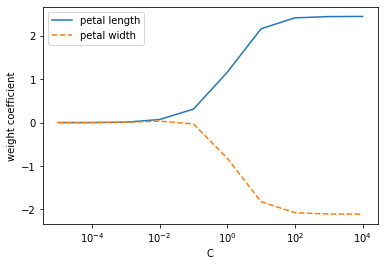

In [28]:
weights, params = [], []
for c in np.arange(-5, 5):
    lr = LogisticRegression(C=10.**c, random_state=1, multi_class='ovr')
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10.**c)

weights = np.array(weights)
plt.plot(params, weights[:, 0],
         label='petal length')
plt.plot(params, weights[:, 1], linestyle='--',
         label='petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
# plt.savefig('images/03_08.png', dpi=300)
plt.show()

# 서포트 벡터 머신을 사용한 최대 마진 분류

서포트 벡터 머신(Support Vector Machine, SVM)은 강력하고 널리 사용되는 학습 알고리즘이다. 
SVM은 퍼셉트론의 확장으로 생각할 수 있다. SVM의 최적화 대상은 마진을 최대화하는 것이다. 마진은 클래스를 구분하는 초평면(결정 경계)과 이 초평면에 가장 가까운 훈련 샘플 사이의 거리로 정의한다. 이런 샘플을 **서포트 벡터**(support vector)라고 한다. 

In [29]:
Image(url='https://git.io/Jtm2r', width=700) 

## 슬랙 변수를 사용하여 비선형 분류 문제 다루기

In [30]:
Image(url='https://git.io/Jtm26', width=600) 

변수 C를 통해 분류 오차에 대한 비용을 조정할 수 있다. C 값이 크면 오차에 대한 비용이 커진다. C 값이 작으면 분류 오차에 덜 엄격해진다. 매개변수 C를 사용하여 마진 폭을 제어할 수 있고, 편향-분산의 트레이드오프를 조정한다.  
이 개념은 규제와 관련이 있다. 규제가 있는 로지스틱 회귀 모델은 C 값을 줄이면 편향이 늘고 모델 분산이 줄어든다. 

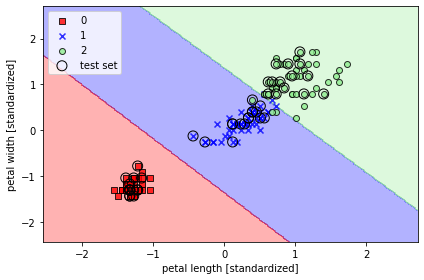

In [31]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, 
                      y_combined,
                      classifier=svm, 
                      test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('images/03_11.png', dpi=300)
plt.show()


# 커널 SVM을 사용하여 비선형 문제 풀기

머신 러닝 기술자 사이에서 SVM이 인기가 높은 또 다른 이유는 비선형 분류 문제를 풀기 위해 커널 방법을 사용할 수 있기 때문이다. 

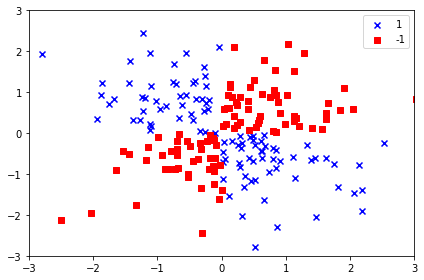

In [32]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(1)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0,
                       X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

plt.scatter(X_xor[y_xor == 1, 0],
            X_xor[y_xor == 1, 1],
            c='b', marker='x',
            label='1')
plt.scatter(X_xor[y_xor == -1, 0],
            X_xor[y_xor == -1, 1],
            c='r',
            marker='s',
            label='-1')

plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.tight_layout()
# plt.savefig('images/03_12.png', dpi=300)
plt.show()

랜덤한 잡음이 섞인 XOR 데이터셋이 만들어진다.  

확실히 양성 클래스와 음성 클래스를 선형 초평면으로 구분할 수 없을 것 같다.  
이렇게 선형적으로 구분되지 않는 데이터를 다루는 커널 방법의 기본 아이디어는 매핑 함수 $\phi$ 를 사용하여 원본 특성의 비선형 조합을 선형적으로 구분되는 고차원 공간에 투영하는 것이다. 

In [33]:
Image(url='https://git.io/Jtm2X', width=700) 

## 커널 기법을 사용해 고차원 공간에서 분할 초평면 찾기

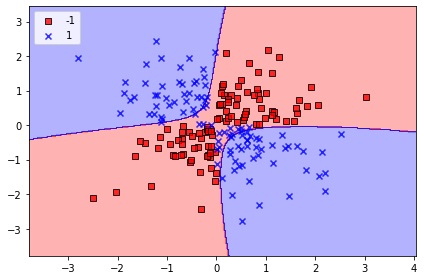

In [34]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.10, C=10.0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor,
                      classifier=svm)

plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('images/03_14.png', dpi=300)
plt.show()


대략적으로 말하면 커널(kernel)이란 용어를 샘플 간의 유사도 함수(similarity funcion)로 해석할 수 있다. 음수 부호가 거리 측정을 유사도 점수로 바꾸는 역할을 한다. 지수 함수로 얻게 되는 유사도 점수는 1(매우 비슷한 샘플)과 0(매우 다른 샘플) 사이 범위를 가진다. 

gamma=0.1로 지정한 매개변수 $\gamma$ 를 가우시안 구의 크기를 제한하는 매개변수로 이해할 수 있다. $\gamma$ 값을 크게 하면 서포트 벡터의 영향이나 범위가 줄어든다. 결정 경계는 더욱 샘플에 가까워지고 구불구불해진다. $\gamma$ 를 잘 이해하기 위해 붓꽃 데이터셋에서 RBF 커널 SVM을 적용해본다.

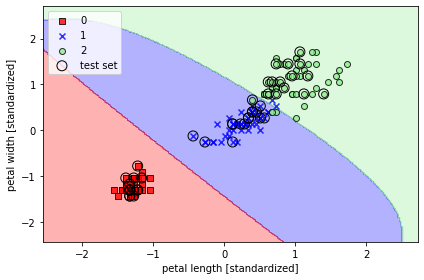

In [35]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,
                      classifier=svm, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('images/03_15.png', dpi=300)
plt.show()

이번에는 $\gamma$ 값을 크게하고 결정 경계에 미치는 영향을 관찰해 보자.

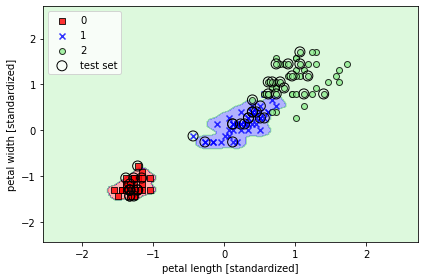

In [36]:
svm = SVC(kernel='rbf', random_state=1, gamma=100.0, C=1.0)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, 
                      classifier=svm, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('images/03_16.png', dpi=300)
plt.show()

비교적 큰 $\gamma$ 값을 사용했기 때문에 클래스 0과 클래스 1 주위로 결정 경계가 매우 가깝게 나타난다.  

이런 분류기는 훈련 데이터에서는 잘 맞지만 본 적 없는 데이터에서는 일반화 오차가 높을 것이다. 알고리즘이 훈련 데이터셋 변화에 너무 민감할 때 $\gamma$ 매개변수가 과대적합 또는 분산을 조절하는 중요한 역할도 한다는 것을 알 수 있다. 

# 결정 트리 학습

결정 트리(decision tree)분류기는 설명이 중요할 때 아주 유용한 모델이다. 결정 트리라는 이름처럼 일련의 질문에 대한 결정을 통해 데이터를 분해하는 모델로 생각할 수 있다. 

In [37]:
Image(url='https://git.io/Jtm21', width=500) 

결정 트리는 훈련 데이터에 있는 특성을 기반으로 샘플의 클래스 레이블을 추정할 수 있는 일련의 질문을 학습한다.  

결정 알고리즘을 사용하면 트리의 루트(root)에서 시작해서 **정보 이득**(Information Gain, IG)이 최대가 되는 특성으로 데이터를 나눈다. 반복 과정을 통해 리프 노드(leaf node)가 순수해질 때까지 모든 자식 노드에서 이 분할 작업을 반복한다. 즉, 각 노드의 모든 훈련 샘플은 동일한 클래스에 속한다. 실제로 이렇게 하면 노드가 많은 깊은 트리가 만들어지고 과대적합될 가능성이 높다. 일반적으로 트리의 최대 깊이를 제한하여 트리를 가지치기(pruning)한다. 

## 정보 이득 최대화: 자원을 최대로 활용

가장 정보가 풍부한 특성으로 노드를 나누기 위해 트리 알고리즘으로 최적화할 목적 함수를 정의한다. 이 목적 함수는 각 분할에서 정보 이득을 최대화한다. 정보 이득은 다음과 같이 정의한다.  
$$IG(D_{p}, f)=I(D_{p})-\sum^{m}_{j=1}{N_{j} \over N_{p}}I(D_{j})$$  

여기서 볼 수 있듯이 정보 이득은 단순히 부모 노드의 불순도와 자식 노드의 불순도 합의 차이이다. 자식 노드의 불순도가 낮을수록 정보 이득이 커진다. 구현을 간단하게 하고 탐색 공간을 줄이기 위해 대부분의 라이브러리는 이진 결정 트리를 사용한다.  

이진 결정 트리에 널리 사용되는 세 개의 불순도 지표 또는 분할 조건은 **지니 불순도**(Gini impurity), **엔트로피**(entropy), **분류 오차**(classification error)이다. 


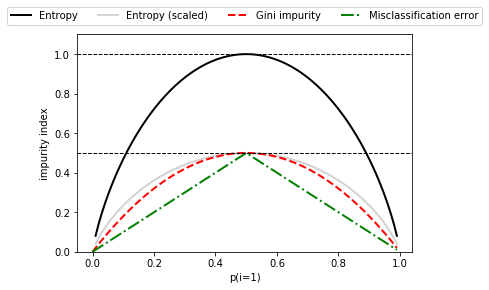

In [38]:
import matplotlib.pyplot as plt
import numpy as np


def gini(p):
    return p * (1 - p) + (1 - p) * (1 - (1 - p))


def entropy(p):
    return - p * np.log2(p) - (1 - p) * np.log2((1 - p))


def error(p):
    return 1 - np.max([p, 1 - p])

x = np.arange(0.0, 1.0, 0.01)

ent = [entropy(p) if p != 0 else None for p in x]
sc_ent = [e * 0.5 if e else None for e in ent]
err = [error(i) for i in x]

fig = plt.figure()
ax = plt.subplot(111)
for i, lab, ls, c, in zip([ent, sc_ent, gini(x), err], 
                          ['Entropy', 'Entropy (scaled)', 
                           'Gini impurity', 'Misclassification error'],
                          ['-', '-', '--', '-.'],
                          ['black', 'lightgray', 'red', 'green', 'cyan']):
    line = ax.plot(x, i, label=lab, linestyle=ls, lw=2, color=c)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
          ncol=5, fancybox=True, shadow=False)

ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0, 1.1])
plt.xlabel('p(i=1)')
plt.ylabel('impurity index')
# plt.savefig('images/03_19.png', dpi=300, bbox_inches='tight')
plt.show()

## 결정 트리 만들기

결정 트리는 특성 공간을 사각 격자로 나누기 때문에 복잡한 결정 경계를 만들 수 있다. 결정 트리가 깊어질수록 결정 경계가 복잡해지고 과대적합되기 쉽기 때문에 주의해야 한다. 

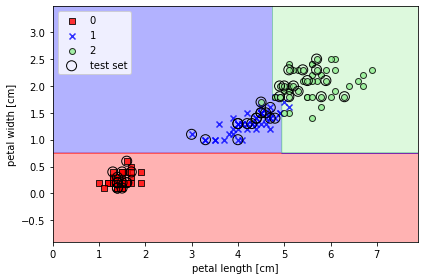

In [39]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(criterion='gini', 
                                    max_depth=4, 
                                    random_state=1)
tree_model.fit(X_train, y_train)

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, 
                      classifier=tree_model,
                      test_idx=range(105, 150))

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('images/03_20.png', dpi=300)
plt.show()

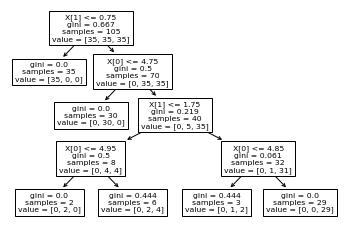

In [40]:
from sklearn import tree

tree.plot_tree(tree_model)
plt.show()


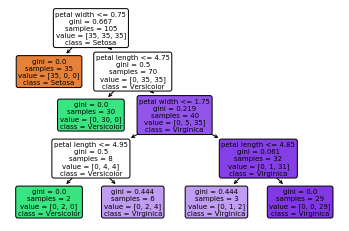

In [41]:
tree.plot_tree(tree_model,
               impurity=True,
               filled=True, 
               rounded=True,
               class_names=['Setosa', 
                            'Versicolor',
                            'Virginica'],
               feature_names=['petal length', 
                              'petal width'])
plt.show()


In [43]:
!pip install pydotplus

     |████████████████████████████████| 278 kB 4.7 MB/s eta 0:00:01
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24575 sha256=c0621dc92c3987aa310e7c1138cfb15dd79a497ba7b1459c51c7db16ba07b6e6
  Stored in directory: /Users/hanhyeongu/Library/Caches/pip/wheels/89/e5/de/6966007cf223872eedfbebbe0e074534e72e9128c8fd4b55eb
Successfully built pydotplus


In [44]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

dot_data = export_graphviz(tree_model,
                           filled=True, 
                           rounded=True,
                           class_names=['Setosa', 
                                        'Versicolor',
                                        'Virginica'],
                           feature_names=['petal length', 
                                          'petal width'],
                           out_file=None) 
graph = graph_from_dot_data(dot_data) 
graph.write_png('tree.png') 

True

In [45]:
Image(url='https://git.io/Jtm2H', width=600) 

### Note 
max_depth 외에 사이킷런의 결정 트리에서 지원하는 대표적인 사전 가지치기 설정은 다음과 같다. 
- max_leaf_nodes: 리프 노드의 최대 개수를 지정.
- min_samples_leaf: 리프 노드가 되기 위한 최소 샘플 개수나 샘플의 비율을 지정.
- min_samples_split: 노드 분할을 위한 최소 샘플 개수나 샘플의 비율을 지정.
- min_impurity_decrease: 노드 분할이 감소시킬 최소 불순도를 지정.
- min_impurity_split: 트리 성장을 멈출 불순도 임계 값. (이 매개변수는 사이킷런 0.25버전에서 삭제.)

## 랜덤 포레스트로 여러 개의 결정 트리 연결

랜덤 포레스트는 결정 트리의 앙상블(ensemble)롤 생각할 수 있다. 랜덤 포레스트 이면의 아이디어는 여러 개의 결정 트리를 평균 내는 것이다. 개개의 트리는 분산이 높은 문제가 있지만 앙상블은 견고한 모델을 만들어 일반화 성능을 높이고 과대적합의 위험을 줄인다. 랜덤 포레스트 알고리즘은 다음 네 단계로 요약할 수 있다.  

1. n개의 랜덤한 부트스트랩(bootstrap)샘플을 뽑는다.(훈련 데이터셋에서 중복을 혀용하면서 랜덤하게 n개의 샘플을 선택)
2. 부트스트랩 샘플에서 결정 트리를 학습한다. 각 노드에서 다음과 같이 한다.  
    a. 중복을 호용하지 않고 랜덤하게 d개의 특성을 선택.
    b. 정보 이득과 같은 목적 함수를 기준으로 최선의 분할을 만드는 특성을 사용해서 노드를 분할. 
3. 단계 1~2를 k번 반복. 
4. 각 트리의 예측을 모아 다수결 투표로 클래스 레이블을 할당.   

</br>
랜덤 포레스트는 결정 트리만큼 해석이 쉽지는 않지만 하이퍼파라미터 튜닝에 많은 노력을 기울이지 않아도 되는 것이 큰 장점이다. 앙상블 모델이 개별 결정 트리가 만드는 잡음으로부터 매우 안정되어 있기 때문.

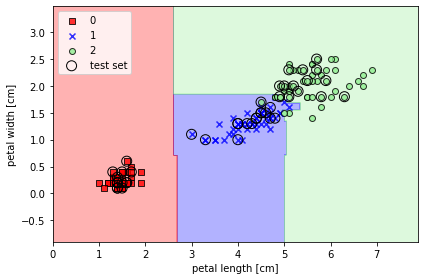

In [46]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion='gini',
                                n_estimators=25, 
                                random_state=1,
                                n_jobs=2)
forest.fit(X_train, y_train)

plot_decision_regions(X_combined, y_combined, 
                      classifier=forest, test_idx=range(105, 150))

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('images/03_22.png', dpi=300)
plt.show()

# K-최근접 이웃: 게으른 학습 알고리즘

마지막 지도 학습 알고리즘은 k-최근접 이웃(K-Nearest Neighbor, KNN)이다. 이 알고리즘은 지금까지의 알고리즘과 근본적으로 다르다. KNN은 전형적인 게으른 학습기(lazy learner)이다. 단순하기에 게으르다고 말하는 것이 아니라 알고리즘은 훈련 데이터에서 판별 함수(discriminative funcion)를 학습하는 대신 훈련 데이터셋을 메모리에 저장하기 때문이다. 

In [48]:
Image(url='https://git.io/Jtm25', width=400) 

KNN 알고리즘은 매우 간단해서 다음 단계로 요약할 수 있다.  
1. 숫자 k와 거리 측정 기준을 선택한다.
2. 분류하려는 샘플에서 k개으 k개의 최근접 이웃을 찾는다.
3. 다수결 투표를 통해 클래스 레이블을 할당한다.  

</br>
선택한 거리 측정 기준에 따라서 KNN 알고리즘이 훈련 데이터셋에서 분류하려는 포인트와 가장 가까운 샘플 k개를 찾는다. 새로운 데이터 포인트의 클래스 레이블을 이 k개의 최근접 이웃에서 다수결 투표를 하여 결정된다. 

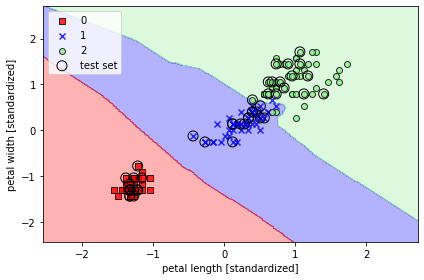

In [49]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, 
                           p=2, 
                           metric='minkowski')
knn.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, 
                      classifier=knn, test_idx=range(105, 150))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('images/03_24.png', dpi=300)
plt.show()

적절한 k를 선택하는 것은 과대적합과 과소적합 사이에서 올바른 균형을 잡기 위해 중요하다. 데이터셋의 특성에 알맞는 거리 측정 지표를 선택해야 한다. 